
<p style="text-align:center;background-color: grey "> 
    <span style="font-size:40px; color:black; font-family:'Times New Roman', serif; font-weight:bold;">
        Task 5 - Stock Market Prediction
        <br>
        TechnoHacks Internship<br><br>
    </span> 
    <span style="font-size:30px; color:black; font-family:'Times New Roman', serif; font-weight:bold;">
        Author - Anuj Nanda Gorkhali
    </span>
</p>

In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math


In [2]:
#txt to csv
df=pd.read_csv('abc.us.txt')
df.to_csv('abc.us.txt',index= None)

In [3]:
df

,Date,Open,High,Low,Close,Volume,OpenInt
0,1995-04-04,2.6690,2.6917,2.5556,2.6782,22205246,0
1,1995-04-05,2.6372,2.6917,2.5782,2.5782,6727902,0
2,1995-04-06,2.5782,2.6690,2.5782,2.6236,2076079,0
3,1995-04-07,2.6372,2.6372,2.5782,2.5782,1056077,0
4,1995-04-10,2.5782,2.6372,2.5782,2.6103,1125568,0
...,...,...,...,...,...,...,...
5686,2017-11-06,74.8600,75.1668,74.8600,74.8600,3478259,0
5687,2017-11-07,74.9200,75.7300,74.5600,74.9100,1777500,0
5688,2017-11-08,74.8700,75.4100,73.2700,75.0100,1710169,0
5689,2017-11-09,75.0700,76.6300,74.9000,75.2700,2576849,0


In [4]:
df.describe()

,Open,High,Low,Close,Volume,OpenInt
count,5691.000000,5691.000000,5691.000000,5691.000000,5.691000e+03,5691.0
mean,29.155922,29.440014,28.869977,29.162565,2.974895e+06,0.0
std,28.277241,28.499514,28.049723,28.277796,3.000631e+06,0.0
min,2.268900,2.328100,2.241400,2.268900,0.000000e+00,0.0
25%,10.344500,10.556000,10.093000,10.338000,1.292712e+06,0.0
50%,17.487000,17.670000,17.305000,17.492000,2.369097e+06,0.0
75%,36.032000,36.326500,35.708000,35.988500,3.840224e+06,0.0
max,112.970000,116.130000,110.660000,111.140000,6.077589e+07,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5691 entries, 0 to 5690
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     5691 non-null   object 
 1   Open     5691 non-null   float64
 2   High     5691 non-null   float64
 3   Low      5691 non-null   float64
 4   Close    5691 non-null   float64
 5   Volume   5691 non-null   int64  
 6   OpenInt  5691 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 311.4+ KB


In [6]:
df.index

RangeIndex(start=0, stop=5691, step=1)

In [7]:
df.isnull().sum()

Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
dtype: int64

In [8]:
from datetime import datetime
df['Date']

0       1995-04-04
1       1995-04-05
2       1995-04-06
3       1995-04-07
4       1995-04-10
           ...    
5686    2017-11-06
5687    2017-11-07
5688    2017-11-08
5689    2017-11-09
5690    2017-11-10
Name: Date, Length: 5691, dtype: object

In [9]:
df['Date']=pd.to_datetime(df['Date'])

In [10]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')

In [11]:
#date as index
df2= df.set_index('Date')
df2

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
1995-04-04,2.6690,2.6917,2.5556,2.6782,22205246,0
1995-04-05,2.6372,2.6917,2.5782,2.5782,6727902,0
1995-04-06,2.5782,2.6690,2.5782,2.6236,2076079,0
1995-04-07,2.6372,2.6372,2.5782,2.5782,1056077,0
1995-04-10,2.5782,2.6372,2.5782,2.6103,1125568,0
...,...,...,...,...,...,...
2017-11-06,74.8600,75.1668,74.8600,74.8600,3478259,0
2017-11-07,74.9200,75.7300,74.5600,74.9100,1777500,0
2017-11-08,74.8700,75.4100,73.2700,75.0100,1710169,0


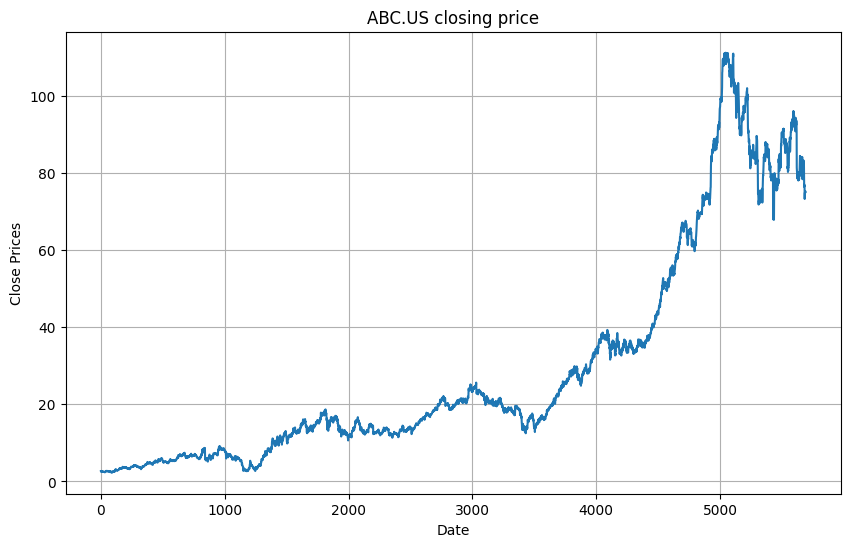

In [12]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(df['Close'])
plt.title('ABC.US closing price')
plt.show()

<Axes: ylabel='Density'>

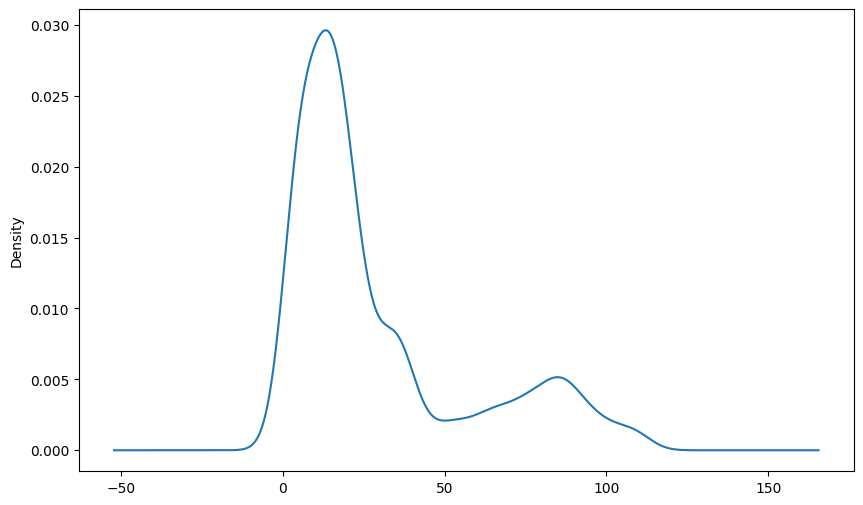

In [13]:
#distribution of the dataset
df2_close =df2['Close']
df2_close.plot(kind= 'kde')

### Checking Stationarity of given dataset

H0: Time Series is not stationary
H1: Time Series is Stationary
    

In [14]:
from statsmodels.tsa.stattools import adfuller
x= df2['Close'].values
result = adfuller(x)
print('Pvalue : ',round(result[1],3))
print('ADF Statistics:',round(result[0],3))
for key, value in result[4].items():
    print('\t:',key,value)

Pvalue :  0.917
ADF Statistics: -0.357
	: 1% -3.431506286541885
	: 5% -2.862050966697014
	: 10% -2.5670419859429447


Conclusion : As p value>0.05 we dont reject null hypothesis
Interpretation : Time series is not stationary

### Decompostion of Series

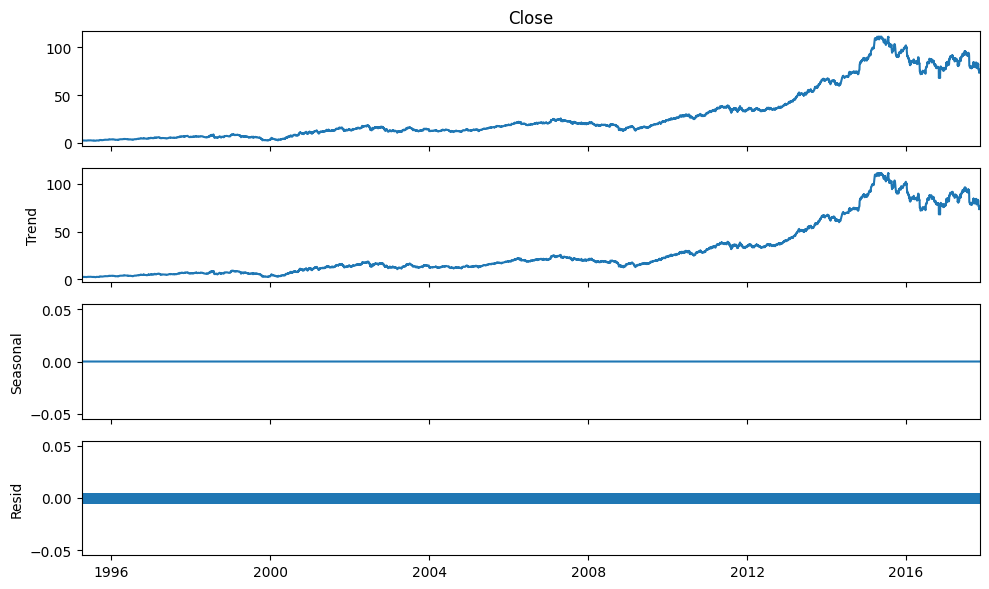

In [15]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
sd= seasonal_decompose(df2_close,model='additive',period=1).plot()

## Making the series Stationary

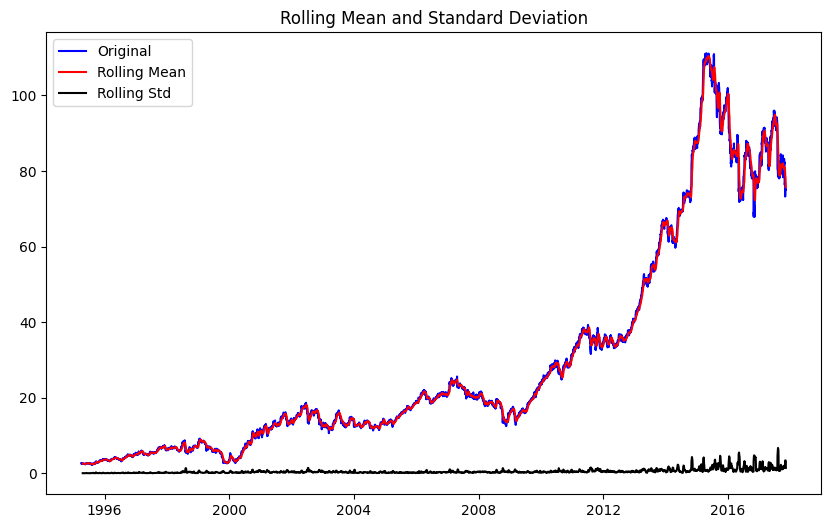

Results of dickey fuller test
Test Statistics                  -0.294583
p-value                           0.926268
No. of lags used                 20.000000
Number of observations used    5670.000000
critical value (1%)              -3.431504
critical value (5%)              -2.862050
critical value (10%)             -2.567041
dtype: float64


In [16]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries,window =12,cutoff =0.05):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()
    
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC',maxlag =20)
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df2_close)

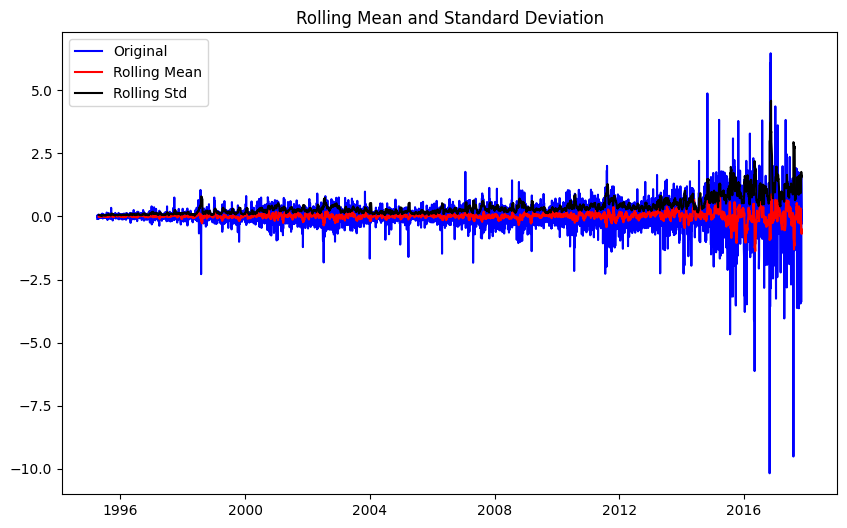

Results of dickey fuller test
Test Statistics               -1.500108e+01
p-value                        1.089573e-27
No. of lags used               2.000000e+01
Number of observations used    5.669000e+03
critical value (1%)           -3.431504e+00
critical value (5%)           -2.862050e+00
critical value (10%)          -2.567041e+00
dtype: float64


In [17]:
df2['close_diff']=df2['Close']-df2['Close'].shift()
test_stationarity(df2['close_diff'].dropna())

Now we are going to create an ARIMA model and will train it with the closing price of the stock on the train data. So let us split the data into training and test set and visualize it.

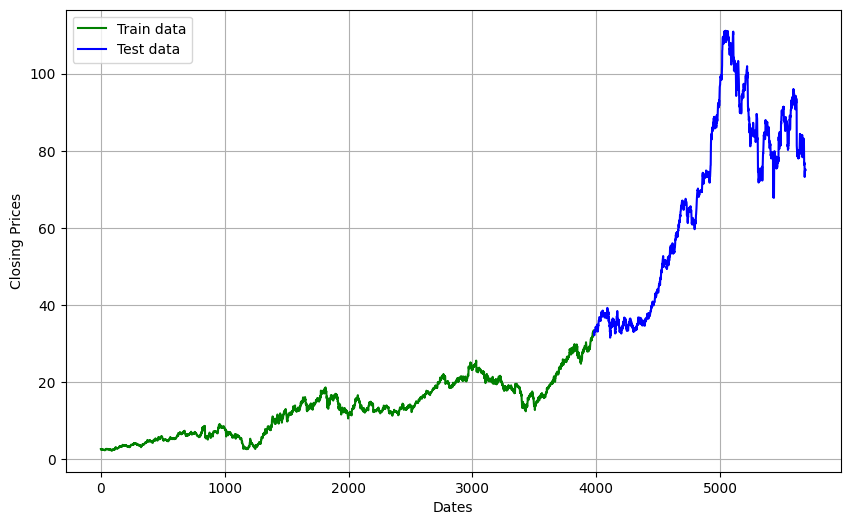

In [18]:
#split data into train and training set
from sklearn.model_selection import train_test_split as split
modelling_series = df['Close']
train,test = split(modelling_series,train_size=0.70,shuffle = False)
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(train, 'green', label='Train data')
plt.plot(test, 'blue', label='Test data')
plt.legend()


Its time to choose parameters p,q,d for ARIMA model


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=799.223, Time=0.71 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=795.724, Time=0.45 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=794.846, Time=0.85 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=800.368, Time=0.37 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=788.740, Time=2.65 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=778.776, Time=3.11 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=777.840, Time=0.57 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=778.525, Time=0.74 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=780.520, Time=1.07 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=779.754, Time=1.34 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0] intercept
Total fit time: 11.898 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3983
Model:               SARIMAX(2, 1, 0)   Log Likelihood                -

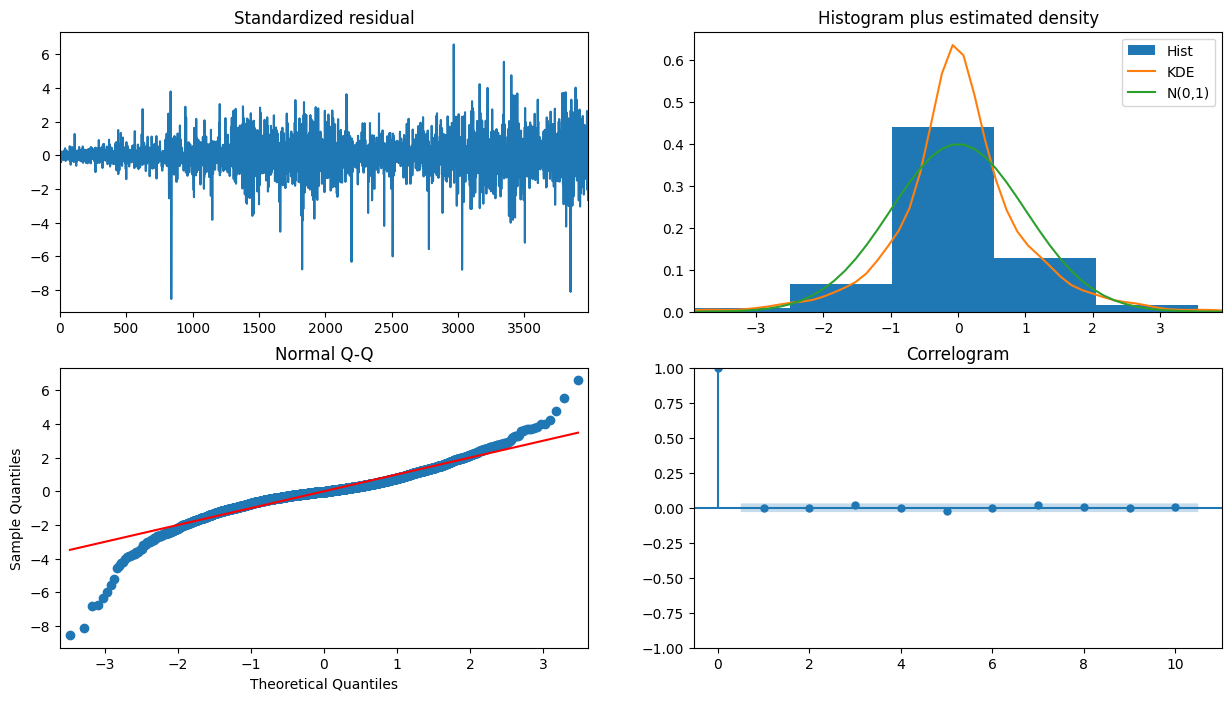

In [19]:
autoarima = auto_arima(train, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(autoarima.summary())
autoarima.plot_diagnostics(figsize=(15,8))
plt.show()

**So the Auto ARIMA model provided the value of p,d, and q as 2, 1 and 0 respectively.**

In [24]:
test.index

Int64Index([3983, 3984, 3985, 3986, 3987, 3988, 3989, 3990, 3991, 3992,
            ...
            5681, 5682, 5683, 5684, 5685, 5686, 5687, 5688, 5689, 5690],
           dtype='int64', length=1708)

In [21]:
from statsmodels.tsa.arima.model import ARIMA
# Build Model
model = ARIMA(train, order=(2,1,0))  
fit = model.fit()  
print(fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3983
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -386.877
Date:                Sat, 18 Nov 2023   AIC                            779.754
Time:                        21:58:20   BIC                            798.622
Sample:                             0   HQIC                           786.444
                               - 3983                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0389      0.011     -3.498      0.000      -0.061      -0.017
ar.L2         -0.0697      0.012     -5.877      0.000      -0.093      -0.046
sigma2         0.0711      0.001     91.938      0.0

In [28]:
# Forecast
df['Forecast_arima'] = fit.predict(start=5090, end=5690)
df

,Date,Open,High,Low,Close,Volume,OpenInt,Forecast_arima
0,1995-04-04,2.6690,2.6917,2.5556,2.6782,22205246,0,NaN
1,1995-04-05,2.6372,2.6917,2.5782,2.5782,6727902,0,NaN
2,1995-04-06,2.5782,2.6690,2.5782,2.6236,2076079,0,NaN
3,1995-04-07,2.6372,2.6372,2.5782,2.5782,1056077,0,NaN
4,1995-04-10,2.5782,2.6372,2.5782,2.6103,1125568,0,NaN
...,...,...,...,...,...,...,...,...
5686,2017-11-06,74.8600,75.1668,74.8600,74.8600,3478259,0,32.667752
5687,2017-11-07,74.9200,75.7300,74.5600,74.9100,1777500,0,32.667752
5688,2017-11-08,74.8700,75.4100,73.2700,75.0100,1710169,0,32.667752
5689,2017-11-09,75.0700,76.6300,74.9000,75.2700,2576849,0,32.667752


Plot the results

<Axes: >

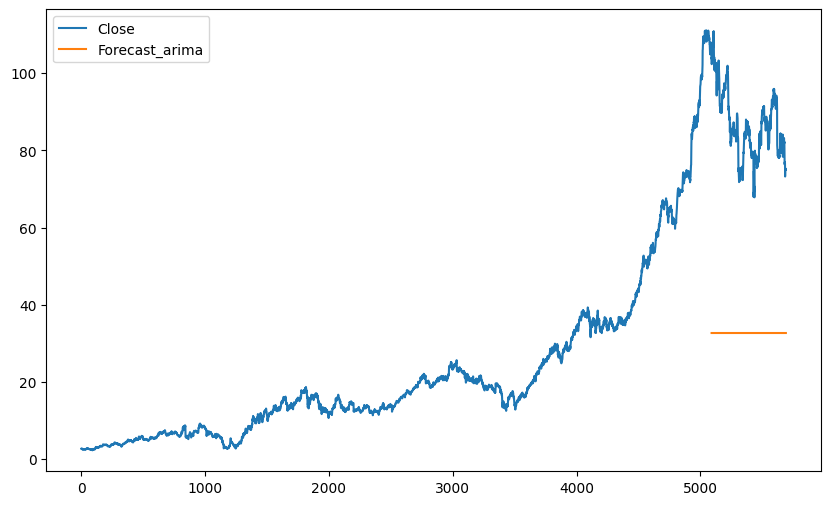

In [29]:
df[['Close','Forecast_arima']].plot()